<a href="https://colab.research.google.com/github/PaulFSherwood/python/blob/master/AI/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Networks**

Imports

In [1]:
%tensorflow_version 2.x # this line is not required unless you are in a notebook
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


**Dataset**

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [5]:
type(train_images)

numpy.ndarray

In [4]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [8]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

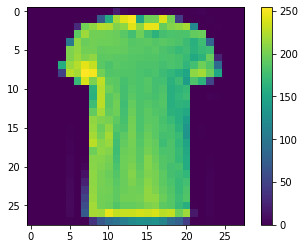

In [30]:
plt.figure()
plt.imshow(train_images[17])
plt.colorbar()
plt.grid(False)
plt.show()

# **Data Preprocessing**

In [31]:
train_images = train_images / 255.0
test_images = test_images / 255.0

**Building the Model**

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

**Compile the Model**

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Training the Model**

In [36]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6395 - accuracy: 0.7761
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3867 - accuracy: 0.8607
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3439 - accuracy: 0.8740
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3126 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2916 - accuracy: 0.8930
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2751 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2676 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2534 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2422 - accuracy: 0.9102
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.233

**Evaluating the Model**

In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8843
Test accuracy: 0.8842999935150146
